In [1]:
import sys, os
p = os.path.abspath('..')
sys.path.insert(1, p)

pp = os.path.abspath('../../visualization')
sys.path.insert(1, pp)

In [2]:
from gc import collect

from utils.statistics import *
from utils.settings import set_matplotlib
from distribution_collector import (collect_topic_distributions,
                                get_top_and_bottom_topics,
                                extract_specific_topics)
from constants import CONSTANTS
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess

In [3]:
# set_matplotlib()

In [18]:
data_dir = f'../../visualization/{CONSTANTS.bert_monthly_data_dir[3:]}'
output_dir = './fig/'
date_range = 'Weekly'
model = 'BERT'


In [13]:
print(data_dir)

../../visualization/result/bert_based/run_id_0/data


In [14]:
window = 7
top_and_bottom_topics = get_top_and_bottom_topics(data_dir)
weekly_topic_distributions_wo = collect_topic_distributions(window=window,
                                                            data_dir=data_dir, weekday_list = None, options=None)
weekly_topic_distributions = collect_topic_distributions(window=window,
                                                            data_dir=data_dir, weekday_list = None, options=None)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>get_monthly_topics_counts
['2021-12-01 00:00:00', '2021-12-08 00:00:00', '2021-12-15 00:00:00', '2021-12-22 00:00:00', '2021-12-29 00:00:00', '2022-01-05 00:00:00', '2022-01-12 00:00:00', '2022-01-19 00:00:00', '2022-01-26 00:00:00', '2022-02-02 00:00:00', '2022-02-09 00:00:00', '2022-02-16 00:00:00', '2022-02-23 00:00:00', '2022-03-02 00:00:00', '2022-03-09 00:00:00', '2022-03-16 00:00:00', '2022-03-23 00:00:00', '2022-03-30 00:00:00', '2022-04-06 00:00:00', '2022-04-13 00:00:00', '2022-04-20 00:00:00', '2022-04-27 00:00:00', '2022-05-04 00:00:00', '2022-05-11 00:00:00', '2022-05-18 00:00:00', '2022-05-25 00:00:00', '2022-06-01 00:00:00', '2022-06-08 00:00:00', '2022-06-15 00:00:00', '2022-06-22 00:00:00', '2022-06-29 00:00:00', '2022-07-06 00:00:00', '2022-07-13 00:00:00', '2022-07-20 00:00:00', '2022-07-27 00:00:00', '2022-08-03 00:00:00', '2022-08-10 00:00:00', '2022-08-17 00:00:00', '2022-08-24 00:00:00', '2022-08-31 00:00:00', '20

In [15]:
top_10, bottom_10 = top_and_bottom_topics

top_10_distribution = \
    list(map(lambda d: extract_specific_topics(d, top_10), weekly_topic_distributions))
top_10_to_draw = {topic: [] for topic in top_10}
for topic in top_10:
    for dict_ in top_10_distribution:
        top_10_to_draw[topic].append(dict_[topic])
top_10_proportion = list(map(lambda d: sum(d.values()),
                                top_10_distribution))

bottom_10_distribution = \
    list(map(lambda d: extract_specific_topics(d, bottom_10), weekly_topic_distributions))
bottom_10_to_draw = {topic: [] for topic in bottom_10}
for topic in bottom_10:
    for dict_ in bottom_10_distribution:
        bottom_10_to_draw[topic].append(dict_[topic])
bottom_10_proportion = list(map(lambda d: sum(d.values()),
                                bottom_10_distribution))

In [19]:
def draw_stackedbar(proportion_dict): 
    ### create a figure with multiple subplots
    sharey = True ## 또는 sharey=False
    sharex = True ## 또는 sharex=False
    g_num  = len(proportion_dict.items())

    fig, axs = plt.subplots(1, g_num, figsize = (12, 6), sharey=sharey, sharex=sharex)
    colors = plt.get_cmap('tab20').colors 


    for x, (title, proportion) in enumerate(proportion_dict.items()):
        y_length = len(list(proportion.values())[0])
        bottom = np.array([0.0]*y_length)
        x_rel, divider = get_dist_x_div(list(proportion.values())[0])

        for idx, (topic, count) in enumerate(proportion.items()):
            p = axs[x].bar(x_rel, count, bottom=bottom, label=topic, color = colors[idx])
            bottom += count
        axs[x].axvline(x=0, color='tab:red', linestyle='-.', linewidth=1)
        axs[x].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10)
        axs[x].set_ylabel("Proportion of Posts by Topic", fontsize = 10)
        axs[x].set_title(f'{title}')
        axs[x].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
        
    fig.tight_layout()
    plt.savefig(f"{output_dir}Result_Fig4.png", dpi=300, bbox_inches='tight')
    plt.show();

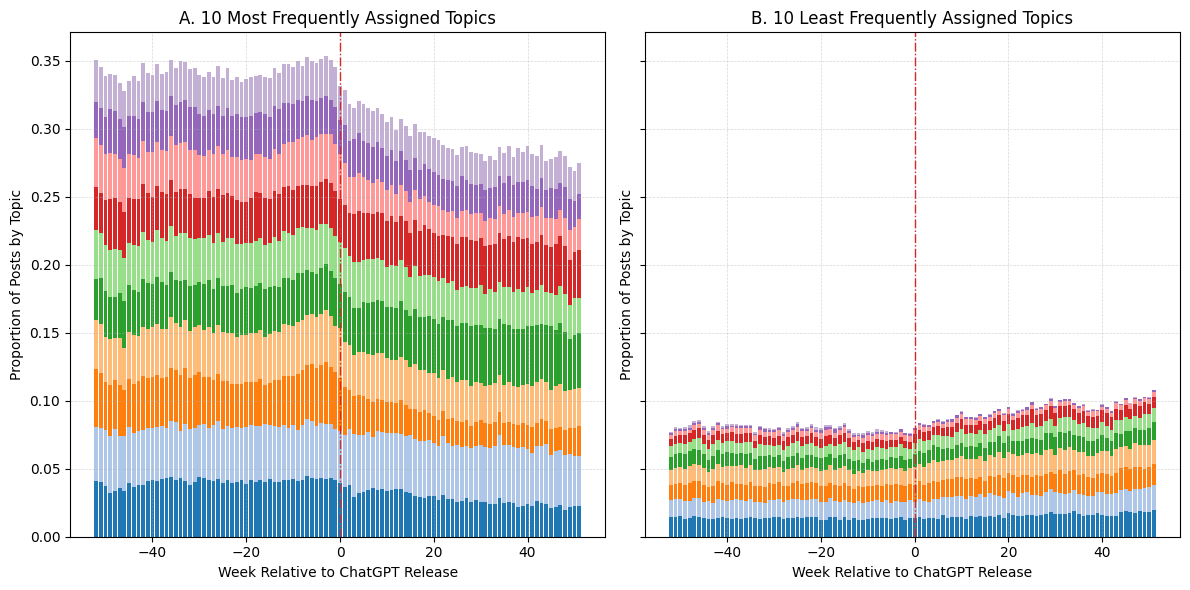

In [20]:
draw_stackedbar({'A. 10 Most Frequently Assigned Topics' : top_10_to_draw
                ,   'B. 10 Least Frequently Assigned Topics' : bottom_10_to_draw})

